<table class="tfo-notebook-buttons" align="left">
<td style="border: none;">
<a target="blank" href="https://colab.research.google.com/github/Hari31416/PYL800/blob/main/Codes/Playing_with_Dice.ipynb?hl=en"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" width="28" height="28"/>Run on Google Colab</a></td>
<td style="border: none;">
<a target="blank" href="https://github.com/Hari31416/PYL800/blob/main/Codes/Playing_with_Dice.ipynb"><img src="https://cdn.icon-icons.com/icons2/2368/PNG/512/github_logo_icon_143772.png" width="28" height="28"/>View on Github</a></td>
<td style="border: none;">
</table>

### Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
from IPython.display import clear_output
import random

### Problem Statement

The problem is this:

A throws 6 dice and wins if he/she gets at least one 1, also called "ACE".

A throws 12 dice and wins if he/she gets at least two 1 Aces.

Who has the greater chance of winning?

I'll start by a simulation. I'll "create" A and B and let them throw the dice a number of time. I'll count the number of times one of them wins. 

In [7]:
class Player:
    def __init__(self, num_dice, name = "X", ):
        """Instantiate a player with a name and number of dice.
        
        Parameters
        ----------
        num_dice : int
            Number of dice

        name : str (optional)
            The name of the player.
            default: "X"

        Returns
        -------
        None
        """
        self.name = name
        self.num_dice = num_dice
        self.wins = 0
        self.all = 0

    def _roll_(self):
        """Roll the dice.
        Updates the `all` attribute accordingly.

        Returns
        -------
        list
            The list of dice rolls.
        """
        self.rolls = []
        for i in range(self.num_dice):
            self.rolls.append(random.randint(1, 6))
        self.all +=1
        return self.rolls

    def check_win(self, num_aces):
        """Check if the player has won.
        Updates the wins attribute accordingly.
        Parameters
        ----------
        num_aces : int
            Number of aces in the roll.
        
        Returns
        -------
        None
        """
        rolls = self._roll_()
        rolls.sort(reverse=True)
        value = ""
        for _ in range(num_aces):
            value += "1"
        
        if value in "".join(str(x) for x in rolls):
            self.wins += 1

    def probabilty(self):
        """Calculate the probability of winning.
        
        Returns
        -------
        float
            The probability of winning.
        """
        return round(self.wins/self.all,4)

In [8]:
A = Player(6)
B = Player(12)

In [9]:
for i in range(100000):
    A.check_win(1)
    B.check_win(2)

In [10]:
A.probabilty()

0.6678

In [11]:
B.probabilty()

0.617

Player A wins.

### Generalizing

#### Plotting Number of Aces vs. Number of Dice

In [5]:
ones = np.arange(1,51)
dice  = ones*6
probability = []

for i in tqdm.tqdm(range(1,51), desc="Calculating Probability..."):
    player = Player(dice[i-1])
    print("Currently on Player: ", i)
    clear_output(wait=True)

    for j in range(100000):
        player.check_win(ones[i-1])
    probability.append(player.probabilty())

Calculating Probability...: 100%|██████████| 50/50 [22:47<00:00, 27.34s/it]


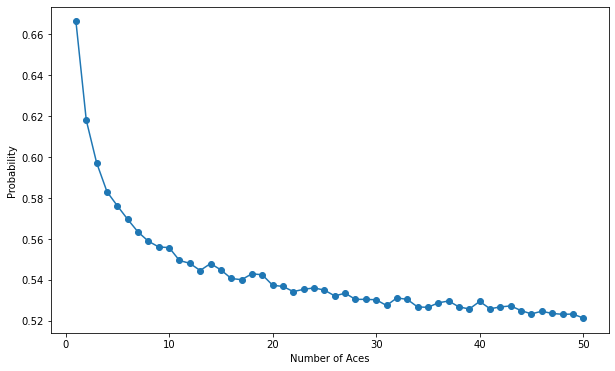

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(ones, probability)
plt.plot(ones, probability)
plt.xlabel("Number of Aces")
plt.ylabel("Probability");

The below two lines of code won't work in google colab or in your local machine!

In [6]:
from life_saving_tools.Notification import Notification
n = Notification()

In [8]:
n.send_whatsapp_text("Hey, I just finished my analysis of the probability of rolling a number of aces in a 6-sided die.")

SM88722a297daf42379c19f3527e614d8f


#### 1000 Aces

In [11]:
X  = Player(6000)
for _ in tqdm.tqdm(range(100000), desc="Calculating Probability..."):
    X.check_win(1000)

X.probabilty()

Calculating Probability...: 100%|██████████| 100000/100000 [21:27<00:00, 77.69it/s]


0.5077

The probability is about 50%.

Again, the below cell won't work in google colab or in your local machine!

In [12]:
prob = X.probabilty()
text = "The probability of rolling 1000 aces in a 6000-sided die is: {}".format(prob)
n.send_whatsapp_text(text)

SM16cf0b20e9eb4c1585c52b13155e8345


#### 10000 Aces

In [41]:
#Run this cell on your own risk
X  = Player(60000)
for _ in tqdm.tqdm(range(100000), desc="Calculating Probability..."):
    X.check_win(10000)

X.probabilty()

Calculating Probability...:   0%|          | 48/100000 [00:06<3:26:36,  8.06it/s]